In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D3-Pamela/S2/Office_Pamela-S2.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:3600]
test_data = df.iloc[3600:]

In [5]:
len(train_data),len(test_data)

(3600, 720)

In [6]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [7]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [8]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [9]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [10]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [11]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (3576, 24, 1)
y_train.shape =  (3576,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [12]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [13]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', input_shape=(X_train.shape[1],1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24)                2496      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
28/28 [==============================] - 6s 27ms/step - loss: 1075.1832
Epoch 2/300
28/28 [==============================] - 1s 26ms/step - loss: 1002.3549
Epoch 3/300
28/28 [==============================] - 1s 20ms/step - loss: 905.9874
Epoch 4/300
28/28 [==============================] - 1s 29ms/step - loss: 787.8283
Epoch 5/300
28/28 [==============================] - 1s 33ms/step - loss: 693.6642
Epoch 6/300
28/28 [==============================] - 1s 24ms/step - loss: 637.2104
Epoch 7/300
28/28 [==============================] - 1s 25ms/step - loss: 590.9280
Epoch 8/300
28/28 [==============================] - 1s 27ms/step - loss: 541.9063
Epoch 9/300
28/28 [==============================] - 1s 35ms/step - loss: 505.7829
Epoch 10/300
28/28 [==============================] - 1s 24ms/step - loss: 479.2097
Epoch 11/300
28/28 [==============================] - 0s 17ms/step - loss: 455.6183
Epoch 12/300
28/28 [==============================] - 0s 12ms/step - loss: 433.8945

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [18]:
print('Root Mean Squared Error for LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for LSTM Model for training is:',mae_train)
print('Mean Absolute Error for LSTM Model for testing is:',mae_test)
print('MAPE for LSTM Model for training is:',mape_train)
print('MAPE for LSTM Model for testing is:',mape_test)

Root Mean Squared Error for LSTM Model for training is: 2.6238521906074745
Root Mean Squared Error for LSTM Model for testing is: 3.061378440564333
Mean Absolute Error for LSTM Model for training is: 2.003087808353563
Mean Absolute Error for LSTM Model for testing is: 2.201820403463461
MAPE for LSTM Model for training is: 0.07393514719670001
MAPE for LSTM Model for testing is: 0.09494679256670134


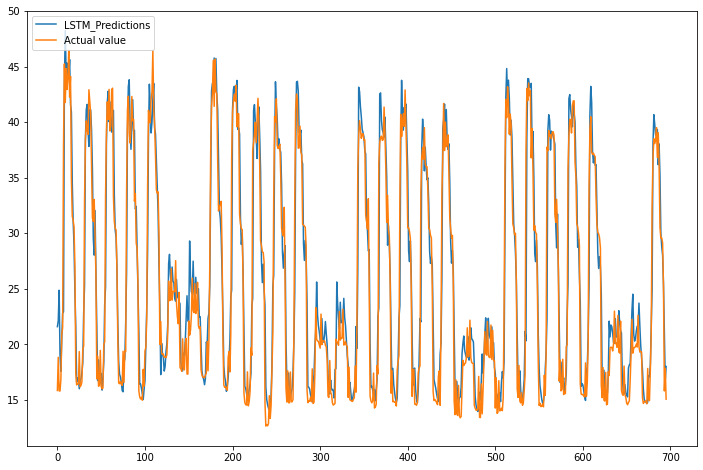

In [19]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [20]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([15.85]), array([21.5948], dtype=float32))

In [21]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-5.74480095]), array([-3.29057567]), array([-9.05508702]), array([-3.27128334]), array([-0.71033299]), array([0.39825847]), array([-1.2965641]), array([14.87280922]), array([1.73674571]), array([-6.46632741]), array([0.45747096]), array([-2.39407451]), array([0.09016139]), array([2.30011902]), array([-3.37837016]), array([2.54672241]), array([-6.00866089]), array([-3.02340851]), array([0.05899315]), array([1.62696736]), array([2.27791469]), array([-4.19303716]), array([-0.27247658]), array([-0.50527064]), array([-0.39324862]), array([3.34612808]), array([-0.54386622]), array([-0.62893588]), array([-0.79382312]), array([1.18603795]), array([-2.98832944]), array([7.7098746]), array([-0.21364467]), array([-1.02443135]), array([-2.29989929]), array([-0.37433014]), array([5.1036288]), array([0.77694753]), array([-0.30862935]), array([-3.00623424]), array([-4.39352773]), array([1.53083331]), array([5.01751404]), array([-2.16848933]), array([-0.27294998]), array([-4.73700104]), array(

In [22]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([17.05407702]), array([-9.05508702]))

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(456, 240)